# Calculate and plot cell cycle signature for G2 - Figure 6C

In [1]:
%matplotlib inline

import os
import helper_functions_GSE164638 as hf

import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt

## Import/Export Directories

In [2]:
# for AnnData objects from Scanpy:
# These AnnData objects contain output from the filtering and QC notebook
# Containing unnormalized counts matrices with low-count barcodes removed
h5ad_dir = '_h5ad_files'
os.makedirs(h5ad_dir, exist_ok=True)

# for plots from matplotlib, seaborn, helper functions plots:
plot_dir = '_plots_g2_score_analysis'
os.makedirs(plot_dir, exist_ok=True)

## Plotting Settings

In [3]:
# scanpy
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                     frameon=True, vector_friendly=True, fontsize=14, 
                     figsize=None, color_map=None, format='eps', 
                     facecolor=None, transparent=False, ipython_format='png2x')

In [4]:
# matplotlib params:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=12)
plt.rcParams['pdf.fonttype'] = 42

# seaborn
sns.set(context='notebook', style='white', font_scale=0.5)

## Load single cell data

In [5]:
adata = sc.read(f'{h5ad_dir}/adata_merged_annotated_perturbations.h5ad')

In [6]:
# optionally restrict to cells which have at least 1000 counts

### Calculate the score based on G2/M gene markers 

In [7]:
g2_genes = ['top2a', 'ccnb1', 'aurka', 'plk1']

# our data is already normalized to CP10K
# then we log the data with a pseudocount of 1
# and then zscore the data
# so we are just going to use our processed adata for this calculation!

adata_cp10K_g2 = adata[:, g2_genes].X.mean(axis=1) 

### Add them to the adata

In [8]:
g2_scores2 = pd.DataFrame(adata_cp10K_g2)

In [9]:
adata.obs['g2_score'] = g2_scores2.values

### Plot the scores 

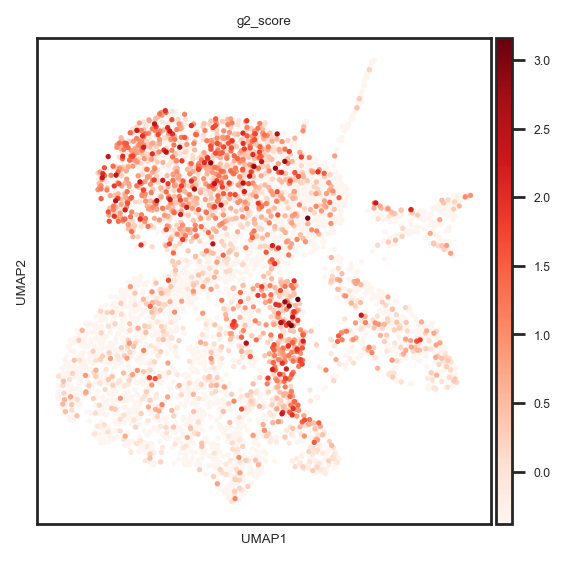

In [10]:
sc.pl.umap(adata, color='g2_score', cmap='Reds', save='_g2_score_perturbations')

#### Briefly compare to expression pattern of ccnb1 as a sense check (which should match up nicely)

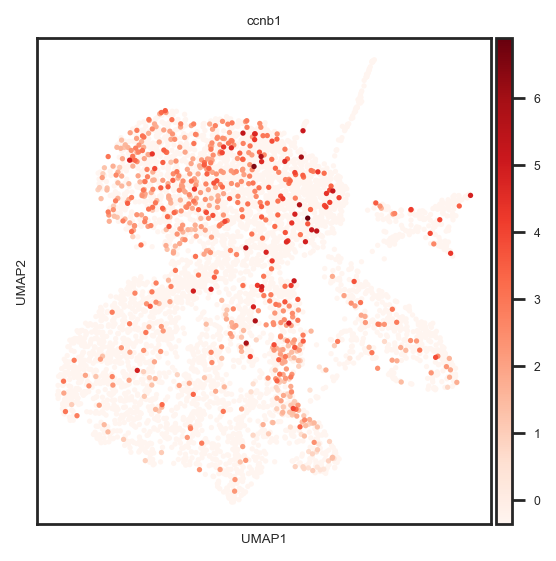

In [11]:
sc.pl.umap(adata, color='ccnb1', cmap='Reds', save='_ccnb1_perturbations')

### Make new copies of adata with the g2 score added

In [12]:
adata_36 = adata[adata.obs['duration'].isin(['36h'])]

In [13]:
adata_36_dmso = adata_36[adata_36.obs['treatment'].isin(['DMSO'])]

In [14]:
adata_36_cftr = adata_36[adata_36.obs['treatment'].isin(['CFTR-inh172'])]

### Plot the G2 scores for CFTRinh-172 v. DMSO 
* Hypothesis: G2 scores are very similar (overlapping in plots below) in CFTR-inh172 v. DMSO because proliferation is not greatly affected by EdU measurements. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


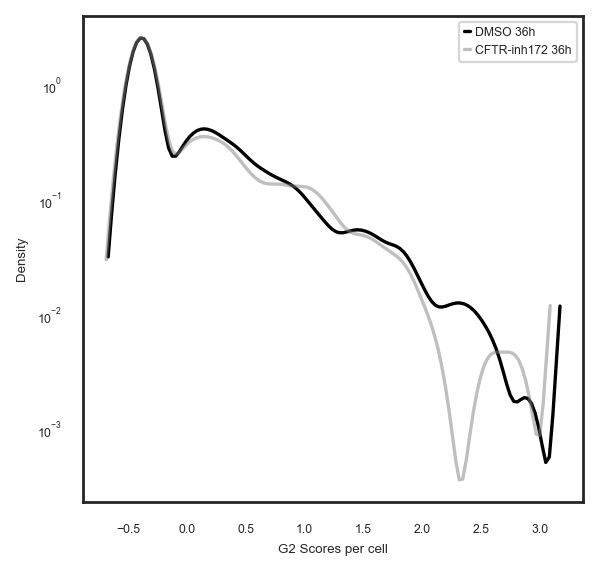

In [15]:
sns.kdeplot(adata_36_dmso.obs['g2_score'], label='DMSO 36h', color='black')
sns.kdeplot(adata_36_cftr.obs['g2_score'], alpha = 0.5, label='CFTR-inh172 36h', color='gray')

plt.yscale('log')
plt.ylabel('Density')
plt.xlabel('G2 Scores per cell')
plt.legend(loc='upper right')
plt.savefig(f'{plot_dir}/G2_scores_cftrinh172_expt_seaborn_kdeplot_logscale.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

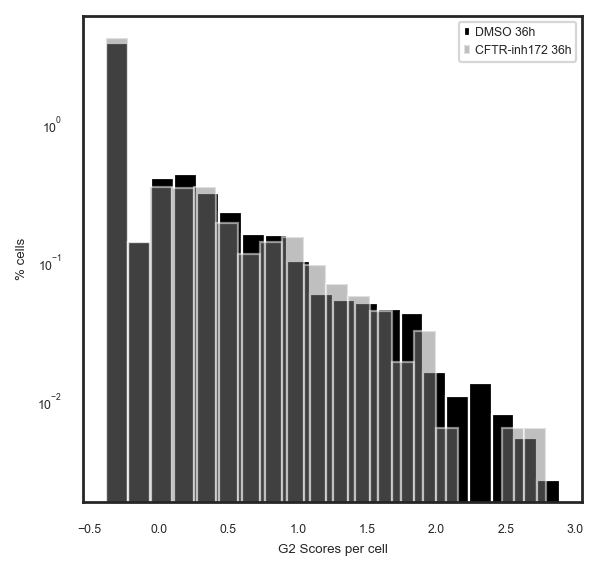

In [16]:
nD, binsD, patchesD = plt.hist(adata_36_dmso.obs['g2_score'], density=True, bins=20, label='DMSO 36h', color='black')
nC, binsC, patchesC = plt.hist(adata_36_cftr.obs['g2_score'], density=True, bins=20, alpha = 0.5, label='CFTR-inh172 36h', color='gray')

plt.yscale('log')
plt.ylabel('% cells')
plt.xlabel('G2 Scores per cell')
plt.legend(loc='upper right')
plt.savefig(f'{plot_dir}/G2_scores_cftrinh172_expt_bins20_logscale.eps')